<a href="https://colab.research.google.com/github/aliciasimmons/ASL-data-science-and-analytics/blob/main/11_3_2_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.3.2 Activity

##Breast cancer detection

###According to the American Cancer Society:

Breast cancer is the most common cancer in American women other than skin cancers. The average risk of a woman in the United States developing breast cancer sometime in her life is about 13%. This means there is a one in eight chance that she will develop breast cancer.

Mammograms are used to detect breast cancer—hopefully at an early stage. However, many masses that appear on a mammogram are not actually cancer. Developing a machine learning model to predict whether a tumor is benign or cancerous would be helpful for physicians as they guide and treat patients. 

In this activity we will evaluate the predictive ability of the model we developed in the last lesson.



#Step 1: Download and save the `cancer.csv` dataset from the class materials.  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `cancer.csv` dataset by running the following code block. 

* When prompted, navigate to and select the `cancer.csv` dataset from where you saved it on your computer.

In [27]:
#Step 2

from google.colab import files
cancer = files.upload()

Saving cancer.csv to cancer (1).csv


#Step 3: Import necessary packages.

```
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

```

In [26]:
#Step 3
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np


# Step 4: Create a Pandas DataFrame from the CSV file.
* Name the DataFrame `cancer`.
* Print the first five observations of `cancer`.  Note the kinds of data it contains.

In [3]:
#Step 4
cancer = pd.read_csv('cancer.csv')

cancer.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


#Step 5: Prepare and model the data. 
* Run the following code block to prepare and model the data.

In [4]:
#Step 5

cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0

y = cancer[['cancer_present']]
X = cancer[['perimeter_mean']]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Step 6: Calculate the model accuracy.
* We did this in the last lesson but it doesn't hurt to practice!
* Calculate the model accuracy using `.score()`.
* Name the results `accuracy` and print its value.





In [5]:
#Step 6
accuracy = log_reg_model.score(X_train, y_train)
print(accuracy)



0.8908450704225352


#Step 7: Calculate the predicted probability of each tumor being benign or malignant.
* We did this in the last lesson but it doesn't hurt to practice!
* Calculate predicted probabilities for the training data using `.predict_proba()`.
* Name the results `probs_`.
* Convert `probs_` to a Panda's DataFrame and name the results `probs`.
* Print the header of `probs`.





In [6]:
#Step 7
probs_ = log_reg_model.predict_proba(X_train)
probs = pd.DataFrame(probs_)
probs.head(5)




,0,1
0,0.878251,0.121749
1,0.183882,0.816118
2,0.986293,0.013707
3,0.540649,0.459351
4,0.000414,0.999586


#Step 8: Calculate the predicted class of each tumor—benign or malignant.
* We did this in the last lesson, but it doesn't hurt to practice!
* Calculate predicted probabilities for the training data using `.predict()`.
* Name the results `classes_`.
* Convert `classes_` to a Panda's DataFrame and name the results `classes`.
* Print the header of `classes`.





In [7]:
#Step 8
log_reg_model = log_reg.fit(X_train, y_train)
classes_ = log_reg_model.predict(X_train)
classes = pd.DataFrame(classes_)
classes.head(5)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


#Step 9: Compute the confusion matrix.
* Use `confusion_matrix(y_train, classes)` to calculate the confusion matrix.
* The Sklearn documentation tells us how to interpret the number in each cell of the confusion matrix, C:

"Thus in binary classification, the count of true negatives is C00, false negatives is C10, true positives is C01 and false positives is C11."

When indexing the rows and columns of a matrix, remember that the first index refers to the row number and the second index refers to the column number.

* Identify how many tumors were:

1. Classified correctly as benign
2. Classified incorrectly as benign
3. Classified incorrectly as malignant
4. Classified correctly as malignant





In [8]:
#Step 9
confusion_matrix(y_train, classes)



array([[165,  10],
       [ 21,  88]])

#Step 9: 

Answer:

Identify how many tumors were:

1. Classified correctly as benign: 
2. Classified incorrectly as benign: 
3. Classified incorrectly as malignant: 
4. Classified correctly as malignant: 

#Step 10: Calculate precision and recall using sklearn.
* Calculate and print precision using `precision_score(y_train, classes)`.
* Calculate and print recall using `precision_score(y_train, classes)`.
* Look back at the confusion matrix from the slide deck.  Where do you see these quantities and what do they represent?


In [9]:
#Step 10
precision_score(y_train, classes)



0.8979591836734694

#Step 10:

Answer: 

#Step 11: Graph the ROC curve
* **At the very top of the code block**, use the following statement to generate the data for the ROC curve.
```
fpr_, tpr_, thresholds_ = metrics.roc_curve(y_train, probs[1])
```

* Run the entire code block to graph the ROC curve.
* Does the model appear to predict better than a coin flip?



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

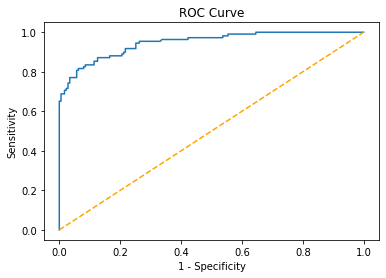

In [28]:
#Step 11

fpr_, tpr_, thresholds_ = roc_curve(y_train, probs[1])


### Write your code above this line.  Leave the remainder of the code block the same

fpr = pd.DataFrame(fpr_)
fpr.rename({0: 'fpr'}, axis=1, inplace=True)

tpr = pd.DataFrame(tpr_)
tpr.rename({0: 'tpr'}, axis=1, inplace=True)

thresholds = pd.DataFrame(thresholds_)
thresholds.rename({0: 'thresholds'}, axis=1, inplace=True)

roc_plot = pd.concat([fpr, tpr, thresholds], axis=1)

plt.plot('fpr', 'tpr', data=roc_plot)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

plt.savefig("ROC.png")
files.download("ROC.png") 


#Step 11:

Answer:



#Step 12: Calculate the AUC.
* Use the following statement to calculate the AUC.  `fpr_` and `tpr_` are the true positive rate and false positive rate generated for the ROC curve above.
```
auc(fpr_, tpr_)
```

* What other word is used as a synonym for "true positve rate"?
* Which label in the ROC curve corresponds to the "false positive rate"?



In [18]:
#Step 12
auc(fpr_, tpr_)

0.947391874180865

#Step 12:

Answer:

